# Import library

In [1]:
import os
import numpy as np
import gzip
from sklearn.metrics import accuracy_score

# Link path

In [2]:
# set names to the paths because they're too long
data_path = "C:\\Users\\LENOVO\Downloads\\"
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

# Unzip

In [3]:
def get_mnist_data(images_path, labels_path, num_images
, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

# Read data

In [4]:
train_images, train_labels = get_mnist_data(
train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(
test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(5000, 784) (5000,)
(10000, 784) (10000,)


# Build methods

In [5]:
# Convert matrix to image
def get_image(image):
    return image.reshape(28, 28)
# These methods are from Vi du 1
def convert_labels(y, C):
    from scipy import sparse
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y
def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A
def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A
def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

def _softmax_regression(X, Y, theta, lambda_=0.5,
    iterations=20, learning_rate=1e-5, batch_size=200):
    from sklearn.metrics import log_loss
    losses = []
    _theta = theta
    d, N = X.shape
    for iter_ in range(iterations):
        shuffle_index = np.random.permutation(N)

        for i in shuffle_index:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(10, 1)
            ai = softmax_stable(np.dot(_theta.T, xi))
            _theta += learning_rate * xi.dot((yi - ai).T)
            if (iter_ * N + i) % batch_size == 0:
                Y_hat = np.dot(_theta.T, X)
                losses.append(log_loss(Y, Y_hat))
        Y_hat = np.dot(_theta.T, X)
        print(f"epoch {iter_} - cost {log_loss(Y, Y_hat) / N}")
    return _theta, losses

# Check data

4 3


<Figure size 640x480 with 0 Axes>

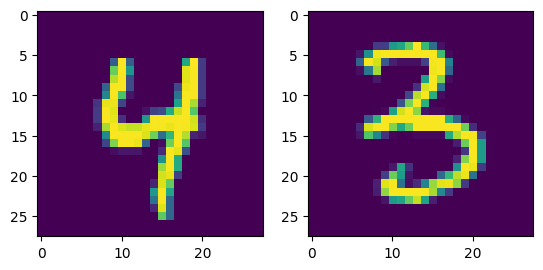

In [6]:
# for display and test digit :D
import random
import matplotlib.pyplot as plt
index = random.randint(0, 1000)
print(train_labels[index], test_labels[index])
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

# Prepare train data

(785, 5000)
(10, 5000)


<Figure size 640x480 with 0 Axes>

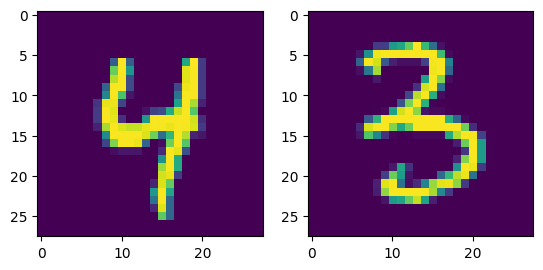

In [7]:
X_train = np.concatenate((np.ones((1, train_images.shape[0])), train_images.T), axis = 0)

Y_train = convert_labels(train_labels, 10)
print(X_train.shape)
print(Y_train.shape)
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

# Training and show loss function

In [8]:
theta = np.zeros((X_train.shape[0], 10))
opt_theta, losses = _softmax_regression(X_train, Y_train, theta)
print('training success: ', opt_theta.shape, len(losses))

epoch 0 - cost 0.7944237634539317
epoch 1 - cost 0.7787592345742922
epoch 2 - cost 0.7839697039321921
epoch 3 - cost 0.7786721052165544
epoch 4 - cost 0.7738236953407298
epoch 5 - cost 0.7777066405645583
epoch 6 - cost 0.7768531898579393
epoch 7 - cost 0.7773975655988286
epoch 8 - cost 0.7757710574637953
epoch 9 - cost 0.7781396620536385
epoch 10 - cost 0.7756467253310397
epoch 11 - cost 0.7749178763685857
epoch 12 - cost 0.775202550425858
epoch 13 - cost 0.7760781793854262
epoch 14 - cost 0.7778414306567213
epoch 15 - cost 0.7739497182322145
epoch 16 - cost 0.7749756377057008
epoch 17 - cost 0.7745219732970707
epoch 18 - cost 0.7784758514349611
epoch 19 - cost 0.7744898035050787
training success:  (785, 10) 500


# Show accuracy score with train and test data

In [9]:
from sklearn.metrics import accuracy_score
print('accuracy training data: ', accuracy_score(train_labels, pred(opt_theta, X_train)))

# test_images, test_labels = get_mnist_data(
# test_images_path, test_labels_path, 1000, _is=False, shuffle=False)
X_test = np.concatenate((np.ones((1, test_images.shape[0])), test_images.T),
axis = 0)

print(X_test.shape)
print('accuracy testing data: ', accuracy_score(test_labels, pred(opt_theta, X_test)))

accuracy training data:  0.9516
(785, 10000)
accuracy testing data:  0.8784


# Show train data

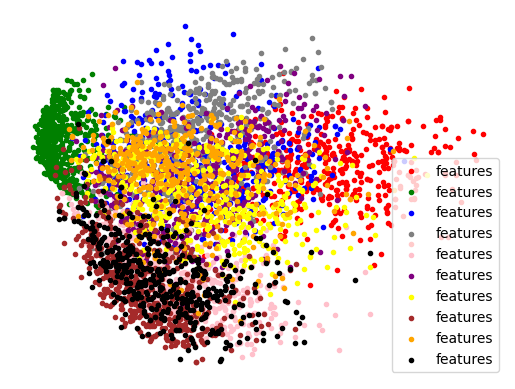

In [10]:
from sklearn.decomposition import PCA as sklearnPCA
import pandas as pd
X_norm = (train_images - train_images.min())/(train_images.max() - train_images.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
colours = ["red", "green", "blue", "gray", "pink", "purple", "yellow", "brown", "orange", "black"]
makers = [">", "1", "8", "s", "p", "+", "D", "X", "v", "^"]
plt.axis("off")
for i in range(0, 10):
    plt.scatter(transformed[train_labels==i][0], transformed[train_labels==i][1], s=9, label='features',
    c = colours[i])
plt.legend()
plt.show()


# Fitting model with linear_model

In [11]:
from sklearn.linear_model import LinearRegression
import math
legr = LinearRegression(fit_intercept=False)
legr.fit(train_images, train_labels)
y_pre_test = [math.floor(value) for value in legr.predict(test_images)]
y_pre_train = [math.floor(value) for value in legr.predict(train_images)]
print("accuracy score test data: ", accuracy_score(y_pre_test, test_labels))
print("accuracy score train data: ", accuracy_score(y_pre_train, train_labels))


accuracy score test data:  0.219
accuracy score train data:  0.244


# Fitting model with logistic regession model

In [13]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)
logr.fit(train_images, train_labels)
print("accuracy score test data:", accuracy_score(logr.predict(test_images), test_labels))
print("accuracy score train data:", accuracy_score(logr.predict(train_images), train_labels))

accuracy score test data: 0.8774
accuracy score train data: 1.0
